In [1]:
import sys
sys.path.append("../")
import models
import models_utils
from mcmc_utils import *
from utils import *

%matplotlib inline

In [2]:
import seaborn as sns
import math
import pandas as pd

In [4]:
m = models.PapaModelC8()
predict = m.predict
data = m.y
error = 0.1
weight_vector = m.domains

prior_min = [0.0001, 0.0001, 0.0001, 1., 3.5, 3.5, 3.5, 3.5]
prior_max = [1., 2., 2., 200., 9., 9., 9., 9.]

In [ ]:
param_values = []
SAMPLES = 5000
for index in range(SAMPLES):
    while(True):
        params = initialise(prior_min, prior_max)
        LL = calculate_log_likelihood(data, error, weight_vector, params, m.predict)
        if (not math.isnan(LL)):
            break
    params.append(LL)
    param_values.append(params)

In [9]:
colmn_names = ["alpha", "D", "Co", "Ns", "K", "K1", "K2", "K3", "LL"]
param_values = pd.DataFrame(param_values, columns = colmn_names)

In [7]:
THRESH = -1800
print sum(param_values["LL"] > THRESH)
print param_values[param_values["LL"] `> THRESH].mean()
print param_values[param_values["LL"] > THRESH].std()

296
alpha       0.243454
D           1.077817
Co          1.000466
Ns        107.165541
K           6.092472
K1          6.720816
K2          6.578896
K3          6.533911
LL      -1487.257940
dtype: float64
alpha      0.287298
D          0.585150
Co         0.558594
Ns        59.045024
K          1.427340
K1         1.473551
K2         1.446152
K3         1.318027
LL       255.298949
dtype: float64


In [20]:
corr = param_values[["alpha", "D", "Co", "Ns", "K", "K1", "K2", "K3"]].corr()

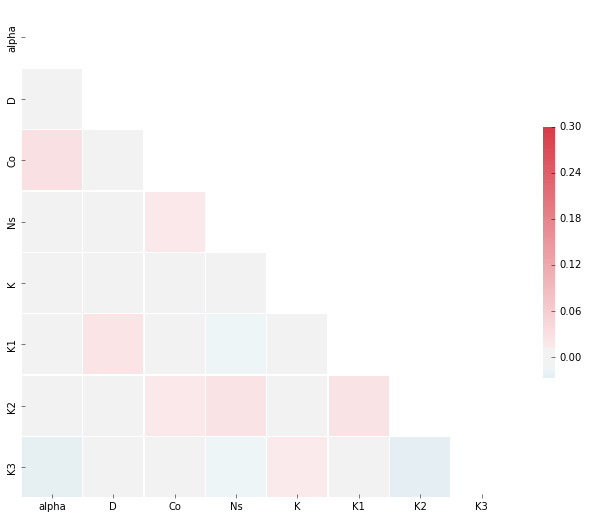

In [21]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})